### Goal

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import pandas as pd
import numpy as np
import math

import rdkit 

import matplotlib.pyplot as plt

sys.path.append("../../data_analysis/")
import helper as hp

In [3]:
savepath = "D01_fragmentatino_test/"
os.makedirs(savepath, exist_ok=True)

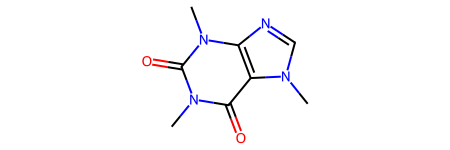

In [4]:
from rdkit import Chem

caffeine_smiles = 'CN1C=NC2=C1C(=O)N(C(=O)N2C)C'
mol = Chem.MolFromSmiles(caffeine_smiles)
mol

In [5]:
from rdkit.Chem.Fraggle import FraggleSim

In [6]:
FraggleSim.generate_fraggle_fragmentation(mol, verbose=False)

['*c1c(=O)n(C)c(=O)n(C)c1*', '*c1ncn(C)c1*']

In [7]:
from rdkit.Chem import Descriptors

molecular_weight = Descriptors.MolWt(Chem.MolFromSmiles(caffeine_smiles))
molecular_weight

194.194

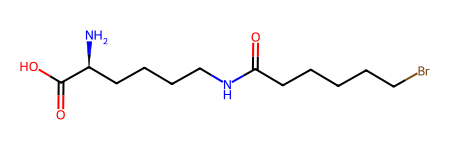

In [23]:
wax4 = "N[C@@H](CCCCNC(=O)CCCCCBr)C(=O)O"
mol = Chem.MolFromSmiles(wax4)
mol

In [9]:
frag_list = FraggleSim.generate_fraggle_fragmentation(mol, verbose=False)
len(frag_list)

62

In [10]:
all_frags = []
for frag in frag_list:
    if "." in frag:
        frags = frag.split(".")
        all_frags.extend(frags)
    else:
        all_frags.append(frag)
all_frags = list(set(all_frags))
len(all_frags)

23

In [11]:
from rdkit.Chem import rdmolops

charge_Z = rdmolops.GetFormalCharge(mol)
charge_Z

0

get if the charge function is workign with another example

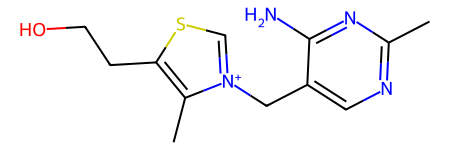

In [12]:
smi_w_charge = "OCCc1c(C)[n+](cs1)Cc2cnc(C)nc2N"
mol_w_charge = Chem.MolFromSmiles(smi_w_charge)
mol_w_charge

In [13]:
rdmolops.GetFormalCharge(mol_w_charge)

1

get the molecular weight of each fragment

In [14]:
d_frag_weight = {}
for smi in all_frags:
    mol = Chem.MolFromSmiles(smi)
    weight = Descriptors.MolWt(mol)
    d_frag_weight[smi] = round(weight,3)
len(d_frag_weight)

23

In [15]:
d_frag_weight

{'*CCCCC(=O)NCCCC[C@H](N)C(=O)O': 229.3,
 '*CCNC(=O)CCCCCBr': 221.118,
 '*CCCC[C@H](N)C(=O)O': 130.167,
 '*NCCCC[C@H](N)C(=O)O': 145.182,
 '*CCCC(=O)NCCCC[C@H](N)C(=O)O': 215.273,
 '*[C@H](N)C(=O)O': 74.059,
 '*CC[C@H](N)C(=O)O': 102.113,
 '*C[C@H](N)C(=O)O': 88.086,
 '*[C@@H](N)CCCCNC(=O)CCCCCBr': 278.214,
 '*NC(=O)CCCCCBr': 193.064,
 '*C(=O)NCCCC[C@H](N)C(=O)O': 173.192,
 '*CCBr': 107.958,
 '*CCCCBr': 136.012,
 '*CCCCNC(=O)CCCCCBr': 249.172,
 '*CCC(=O)NCCCC[C@H](N)C(=O)O': 201.246,
 '*C(=O)CCCCCBr': 178.049,
 '*CCC[C@H](N)C(=O)O': 116.14,
 '*C(=O)O': 45.017,
 '*CCCCCBr': 150.039,
 '*CCCNC(=O)CCCCCBr': 235.145,
 '*CNC(=O)CCCCCBr': 207.091,
 '*CC(=O)NCCCC[C@H](N)C(=O)O': 187.219,
 '*CCCBr': 121.985}

In [16]:
all_mols = []
all_legends = []
for frag, weight in d_frag_weight.items():
    mol = Chem.MolFromSmiles(frag)
    all_mols.append(mol)
    all_legends.append(f"{weight}")
len(all_mols)

23

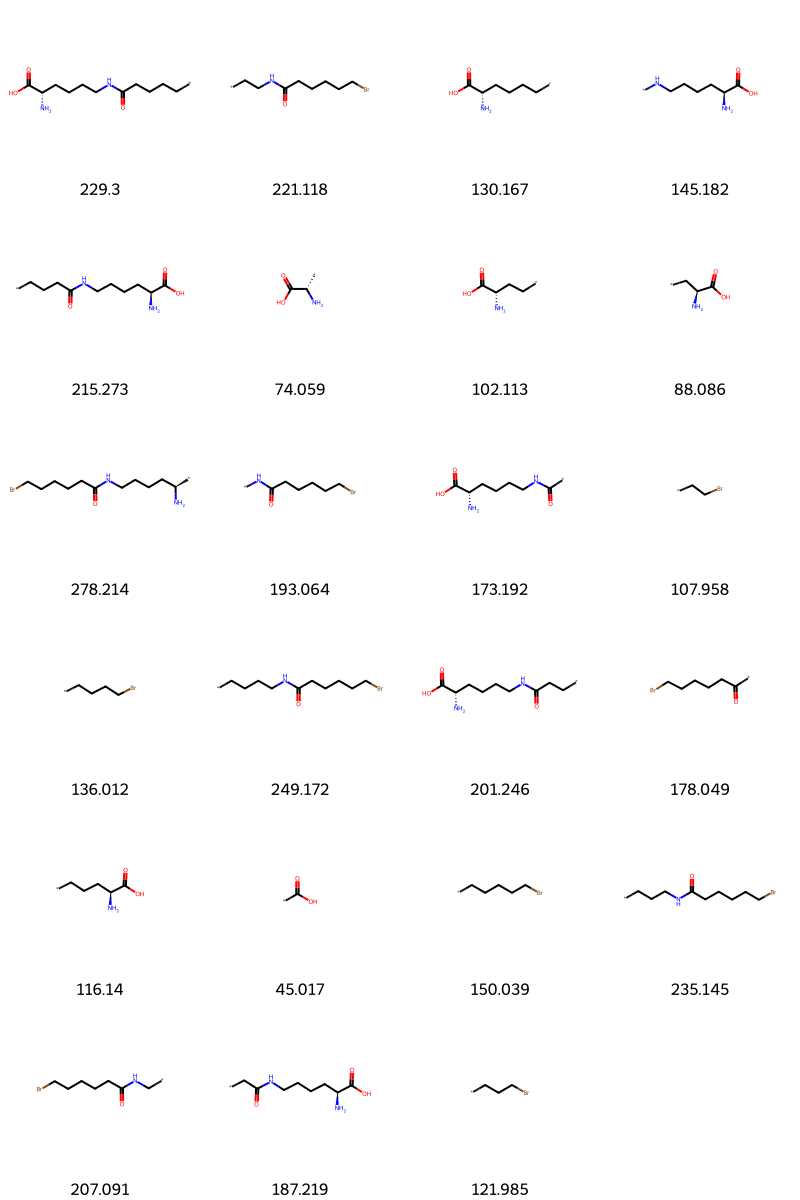

In [17]:
from rdkit.Chem import Draw

# Draw all the molecules in all_mols
img = Draw.MolsToGridImage(all_mols,
                           legends=all_legends, 
                           molsPerRow=4)
img

In [18]:
all_weights = d_frag_weight.values()
np.max(list(all_weights))

278.214

Note

WAX4 sequence: GGV[Wax4]GSPP[Wax4]ITT

In [20]:
# let's use a non used amino acid to turn the whole thing in to a smiles
# and then switch back wax4 in
peptide = "GGVMGSPPMITT"
peptide.count("M")


2

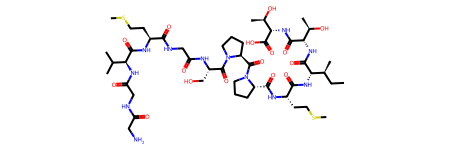

In [31]:
# using 
pep_smi = "NCC(=O)NCC(=O)N[C@@]([H])(C(C)C)C(=O)N[C@@]([H])(CCSC)C(=O)NCC(=O)N[C@@]([H])(CO)C(=O)N1[C@@]([H])(CCC1)C(=O)N1[C@@]([H])(CCC1)C(=O)N[C@@]([H])(CCSC)C(=O)N[C@@]([H])([C@]([H])(CC)C)C(=O)N[C@@]([H])([C@]([H])(O)C)C(=O)N[C@@]([H])([C@]([H])(O)C)C(=O)O"
mol_pep = Chem.MolFromSmiles(pep_smi)
mol_pep

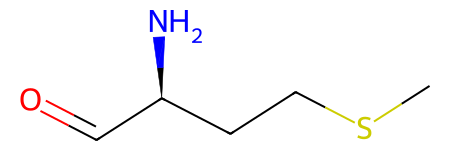

In [32]:
m_smi = "N[C@@]([H])(CCSC)C(=O)"
mol_m = Chem.MolFromSmiles(m_smi)
mol_m

In [33]:
m_smi in pep_smi

True

In [34]:
full_wax4 = pep_smi.replace(m_smi, wax4)
assert full_wax4!=pep_smi

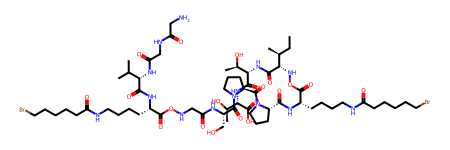

In [35]:
mol_final = Chem.MolFromSmiles(full_wax4)
mol_final

In [36]:
frag_list = FraggleSim.generate_fraggle_fragmentation(mol_final, verbose=False)
len(frag_list)

659

In [37]:
all_frags = []
for frag in frag_list:
    if "." in frag:
        frags = frag.split(".")
        all_frags.extend(frags)
    else:
        all_frags.append(frag)
all_frags = list(set(all_frags))
len(all_frags)

108

In [38]:
d_frag_weight = {}
for smi in all_frags:
    mol = Chem.MolFromSmiles(smi)
    weight = Descriptors.MolWt(mol)
    d_frag_weight[smi] = round(weight,3)
len(d_frag_weight)

108

let's add the two charges options

In [39]:
d_frag_weight_w_charges = {}
for k,v in d_frag_weight.items():
    d_frag_weight_w_charges[k] = v 
    # new one
    _w = (v+2)*2
    d_frag_weight_w_charges[k+"_2+"] = _w
    # new one
    _w = (v-2)*2
    d_frag_weight_w_charges[k+"_2-"] = _w
len(d_frag_weight_w_charges)

324

In [40]:
suneesh_numbers = [796.9, 622.8, 531.7, 766, 757, 1505, 796.9, 765.9, 734, 677, 668, 725, 734, 716, 756.6, 547, 821, 766.5, 777.6, 769, 668, 128, 716, 725]
suneesh_numbers = list(set(suneesh_numbers))
len(suneesh_numbers)

19